# Pipeline for Sentiment Analysis
- General import
- Data Read
- Creating Wordclouds (Stop words filtering)
- Data Preprocessing
- Train-Test Split
- ML Models Training

## General import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

## Data Read

In [2]:
path = "archive/Reviews.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


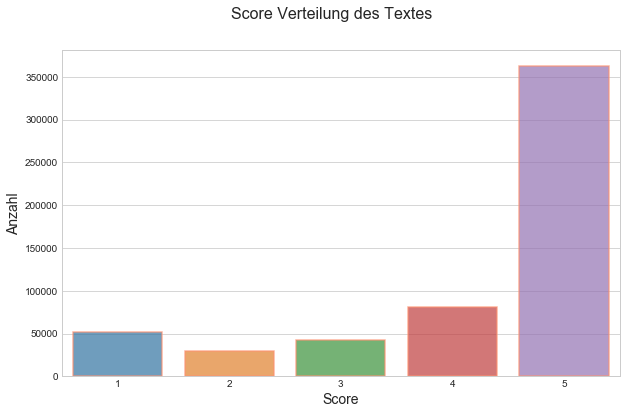

In [5]:
fig = plt.figure(figsize=(10,6))
plt.style.use('seaborn-whitegrid')

fig.suptitle('Score Verteilung des Textes', fontsize=16)
ax1 = fig.add_subplot(111)

plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)

ax1 = sns.countplot(df.Score, edgecolor='#fc9272', linewidth=1.5, alpha=0.7)

ax1.set_xlabel("Score", fontsize=14)
ax1.set_ylabel('Anzahl', fontsize=14)
plt.savefig("score_verteilung_with_neutral.png", format='png', dpi=150)

# Creating WordClouds

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEMEGUE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Use stopwords with all lowercase and words('english') to get a set of English stop words.
from nltk.corpus import stopwords
# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [10]:
#Create stopword list:
stopwords = set(STOPWORDS)
#stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

In [35]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'good',
 'great',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'href',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other'

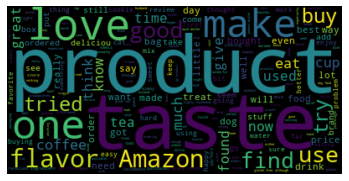

In [11]:
plt.imshow(wordcloud, interpolation='bilinear')
fig = plt.figure(1, figsize=(8, 4))
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

Popular words: taste, product, love, good, Amazon. These are mostly positive, also most reviews in the dataset express a positive sentiment. 

# Data Preprocessing


positive -> +1
negative -> -1

- score < 3 -> -1

- score 3 neutral

- score > 3 -> positive

In [12]:
df.shape

(568454, 10)

In [13]:
df['Score'].value_counts(ascending=False)

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [14]:
df = df[df['Score'] != 3]

In [15]:
df['Score'].value_counts()

5    363122
4     80655
1     52268
2     29769
Name: Score, dtype: int64

In [16]:
df['sentiment'] = df['Score'].apply(lambda rating: +1 if rating > 3 else -1)

In [17]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


Text(0, 0.5, 'Anzahl')

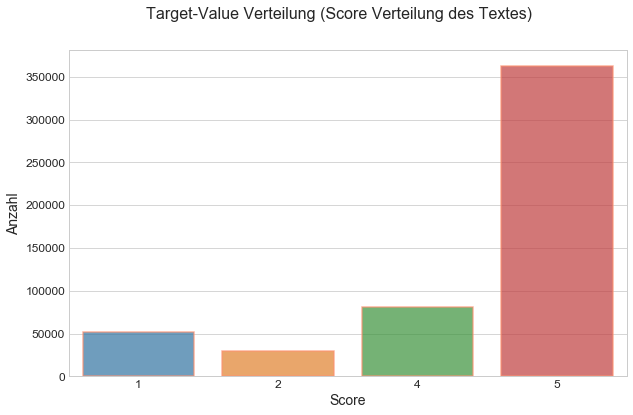

In [19]:
fig = plt.figure(figsize=(10,6))
plt.style.use('seaborn-whitegrid')

fig.suptitle('Target-Value Verteilung (Score Verteilung des Textes)', fontsize=16)
ax1 = fig.add_subplot(111)

plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)

ax1 = sns.countplot(df.Score, edgecolor='#fc9272', linewidth=1.5, alpha=0.7)

ax1.set_xlabel("Score", fontsize=14)
ax1.set_ylabel('Anzahl', fontsize=14)

# Data Cleaning 

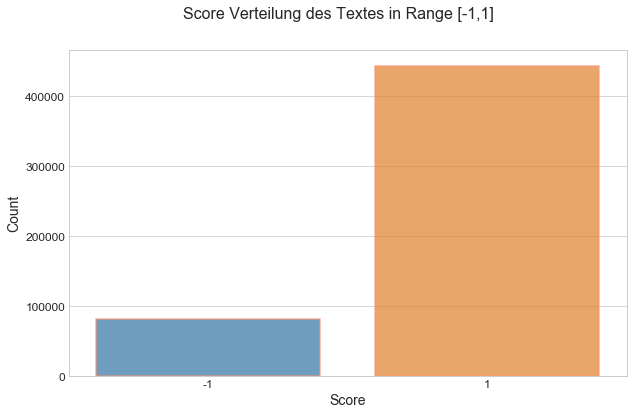

In [20]:
fig = plt.figure(figsize=(10,6))
plt.style.use('seaborn-whitegrid')

fig.suptitle('Score Verteilung des Textes in Range [-1,1]', fontsize=16)
ax1 = fig.add_subplot(111)

plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)

ax1 = sns.countplot(df.sentiment, edgecolor='#fc9272', linewidth=1.5, alpha=0.7)

ax1.set_xlabel("Score", fontsize=14)
ax1.set_ylabel("Count", fontsize=14)


#sns.countplot('sentiment', data=df)
#plt.title("Score Verteilung des Textes", fontsize=16)
#plt.xlabel('Score', fontsize=12)
#plt.ylabel('Count', fontsize=12)
plt.savefig("score_verteilung_without_neutral.png", format='png', dpi=150)
#plt.legend(['asdasd'])
#plt.show()

In [32]:
df.sentiment.value_counts()

 1    443777
-1     82037
Name: sentiment, dtype: int64

In [24]:
# Creating a new columng for sentiment (-1,1)
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [25]:
positive.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,1
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,1


In [22]:
negative.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,-1
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,-1
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",-1


# Wordcloud - Positive Sentiment

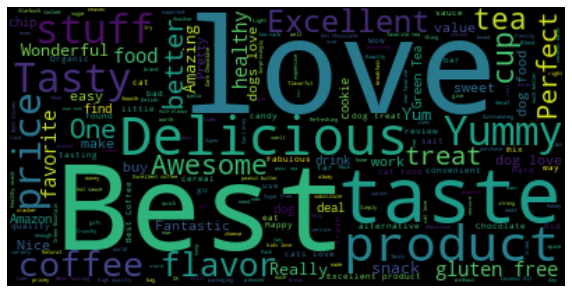

In [27]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.grid(False)
ax1.axis(False)
plt.style.use('seaborn-whitegrid')

stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 

pos = " ".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
ax1 = plt.imshow(wordcloud2, interpolation='bilinear')
plt.savefig('wordcloud_pos.png')
#plt.axis("off")
#plt.show()

In [28]:
negative.Summary.isna().sum()

25

In [29]:
test = negative.dropna(axis=0, how='any')

# Wordcloud - Negative Sentiment

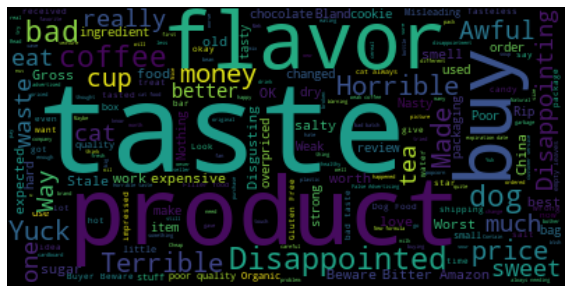

In [37]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.grid(False)
ax1.axis(False)
plt.style.use('seaborn-whitegrid')

stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 

neg = " ".join(review for review in test.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
ax1 = plt.imshow(wordcloud3, interpolation='bilinear')
plt.savefig('wordcloud_neg.png')
#plt.axis("off")
#plt.show()

In [38]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final

df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

In [39]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,Delight says it all,This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price There was a wide...,1


In [40]:
dfNew = df[['Summary','sentiment']]
dfNew.head()

,Summary,sentiment
0,Good Quality Dog Food,1
1,Not as Advertised,-1
2,Delight says it all,1
3,Cough Medicine,-1
4,Great taffy,1


In [41]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [42]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [43]:
X = df.drop(axis=1, labels="Summary")
y = df["Summary"]

In [45]:
test_size = 0.20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=test_size, random_state=0)

# ML Models Training

## 1- Logistic Regression

In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [47]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [48]:
lr.fit(X_train,y_train)

C:\Users\DEMEGUE\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
predictions = lr.predict(X_test)

In [50]:
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[11592,  2335],
       [ 5872, 91395]], dtype=int64)

In [51]:
# The overall accuracy of the model on the test data is around 93%
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.66      0.83      0.74     13927
           1       0.98      0.94      0.96     97267

    accuracy                           0.93    111194
   macro avg       0.82      0.89      0.85    111194
weighted avg       0.94      0.93      0.93    111194



## 2- Linear Support Vector Machine

In [52]:
from sklearn.svm import SVC
svc = SVC()

In [53]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
pred_svc = svc.predict(X_test)

In [55]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

C:\Users\DEMEGUE\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [56]:
pred_svc = clf.predict(X_test)

In [57]:
confusion_matrix(pred_svc,y_test)

array([[12149,  2589],
       [ 5315, 91141]], dtype=int64)

In [59]:
print(classification_report(pred_svc,y_test))

              precision    recall  f1-score   support

          -1       0.70      0.82      0.75     14738
           1       0.97      0.94      0.96     96456

    accuracy                           0.93    111194
   macro avg       0.83      0.88      0.86    111194
weighted avg       0.94      0.93      0.93    111194



## 3 - Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
#max_depth=4, min_samples_leaf=20, min_samples_split=5

In [71]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
pred_dt = dt.predict(X_test)

In [73]:
print(classification_report(pred_dt,y_test))

              precision    recall  f1-score   support

          -1       0.83      0.83      0.83     17418
           1       0.97      0.97      0.97     93776

    accuracy                           0.95    111194
   macro avg       0.90      0.90      0.90    111194
weighted avg       0.95      0.95      0.95    111194



## 4 - Naive Bayes

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
nb = MultinomialNB()

In [66]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
pred_nb = nb.predict(X_test)

In [68]:
confusion_matrix(pred_nb,y_test)

array([[11650,  3711],
       [ 5814, 90019]], dtype=int64)

In [69]:
print(classification_report(pred_nb,y_test))

              precision    recall  f1-score   support

          -1       0.67      0.76      0.71     15361
           1       0.96      0.94      0.95     95833

    accuracy                           0.91    111194
   macro avg       0.81      0.85      0.83    111194
weighted avg       0.92      0.91      0.92    111194



In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

In [ ]:
# Define a function for report
def basic_model_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    
    df_model_report = pd.DataFrame({'model' : [name],
                                    'accuracy' : [accuracy],
                                    'precision' : [precision],
                                    'recall' : [recall],
                                    'f1score' : [f1score]})
    return df_model_report

# Models
lr = LogisticRegression(max_iter=1000)
svc = SVC()
dt = DecisionTreeClassifier()
nb = MultinomialNB()

# Concat all models
df_concat = pd.concat([basic_model_report(lr, X_train, X_test, y_train, y_test, 'LogisticRegression'),
                       basic_model_report(svc, X_train, X_test, y_train, y_test, 'SCV'),
                       basic_model_report(df, X_train, X_test, y_train, y_test, 'DecisionTree'),
                       basic_model_report(nb, X_train, X_test, y_train, y_test, 'NaiveBayes'),
                      ], axis=0).reset_index()

df_concat = df_concat.drop('index', axis=1)
df_concat

In [79]:
def basic_model_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    
    df_model_report = pd.DataFrame({'model' : [name],
                                    'accuracy' : [accuracy],
                                    'precision' : [precision],
                                    'recall' : [recall],
                                    'f1score' : [f1score]})
    return df_model_report

# Models
lr = LogisticRegression(max_iter=1000)
svc = SVC()
dt = DecisionTreeClassifier()
nb = MultinomialNB()

In [90]:
model_lr = basic_model_report(lr, X_train ,X_test, y_train, y_test, 'Log. Regression')

In [91]:
model_lr

,model,accuracy,precision,recall,f1score
0,Log. Regression,0.926696,0.939809,0.975515,0.957329


In [92]:
model_nb = basic_model_report(nb, X_train ,X_test, y_train, y_test, 'Naive Bayes')

In [93]:
model_nb

,model,accuracy,precision,recall,f1score
0,Naive Bayes,0.914339,0.939332,0.960408,0.949753


In [94]:
model_dt = basic_model_report(dt, X_train, X_test, y_train, y_test, 'Decition Tree')

In [95]:
model_dt

,model,accuracy,precision,recall,f1score
0,Decition Tree,0.94542,0.967441,0.967822,0.967631


In [97]:
model_svc = basic_model_report(svc, X_train, X_test, y_train, y_test, 'SVC')

In [98]:
model_svc 

,model,accuracy,precision,recall,f1score
0,SVC,0.953451,0.958439,0.987603,0.972803


In [99]:
df_concat = pd.concat([model_lr, model_nb, model_dt, model_svc], axis=0).reset_index()

In [101]:
df_concat.drop(labels="index", axis=1)

,model,accuracy,precision,recall,f1score
0,Log. Regression,0.926696,0.939809,0.975515,0.957329
1,Naive Bayes,0.914339,0.939332,0.960408,0.949753
2,Decition Tree,0.945420,0.967441,0.967822,0.967631
3,SVC,0.953451,0.958439,0.987603,0.972803


# Cross Validation (StratifiedKFold)

In [147]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
def kf_cross_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
    precision = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    recall = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall' ))
    f1score = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
       
    df_model_report = pd.DataFrame({'model' : [name],
                                    'accuracy': [accuracy],
                                    'precision' : [precision],
                                    'recall' : [recall],
                                    'f1score' : [f1score]})
    return df_model_report

# Models
LR = LogisticRegression(max_iter=1000)
#SVC = SVC()
DT = DecisionTreeClassifier()
NB = MultinomialNB()

In [ ]:
kf_model_LR = kf_cross_report(LR, X_train, X_test, y_train, y_test, 'LogisticRegression')

In [114]:
def clean_sentences(sentence):
    sentence = sentence.lower()
    sentence = re.sub('[^a-z]', ' ', sentence)
    return sentence

df_test['Clean_Summary'] = df_test['Summary'].apply(clean_sentences)

In [116]:
df_test.head()

,Summary,Score,sentiment,Clean_Summary
0,Good Quality Dog Food,5,1,good quality dog food
1,Not as Advertised,1,-1,not as advertised
2,Delight says it all,4,1,delight says it all
3,Cough Medicine,2,-1,cough medicine
4,Great taffy,5,1,great taffy


In [117]:
from sklearn.model_selection import train_test_split

In [120]:
X = df.Clean_Summary
y = df.sentiment
seed = 123

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = seed)

In [127]:
# Vectorizing
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [128]:
# stop_words = 
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3), max_df=0.95, min_df=10)

In [129]:
X_train_vect = vectorizer.fit_transform(X_train)

In [131]:
X_train_vect.shape

(420631, 19672)

In [132]:
vectorizer.get_feature_names()[:10]

['aa',
 'abbey',
 'abby',
 'abc',
 'able',
 'able eat',
 'absolute',
 'absolute best',
 'absolute favorite',
 'absolute garbage']

In [133]:
vectorizer.idf_

array([11.46460697, 11.38456426, 11.38456426, ..., 11.31045629,
       11.00507464, 11.1769249 ])

In [149]:
vectorizer.idf_

array([11.46460697, 11.38456426, 11.38456426, ..., 11.31045629,
       11.00507464, 11.1769249 ])